In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import r2_score,confusion_matrix


In [2]:
df=pd.read_csv('Iris.csv',header=None)

In [3]:
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## DataCleaning

In [4]:
label=LabelEncoder()

In [5]:
df['Species']=label.fit_transform(df['Species'])

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     1
PetalLengthCm    1
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
def clean(data):
    for col in df :
        df[col].fillna(df[col].mean(),inplace=True)
        
clean(df)            

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Error Handeling

In [10]:
# # Calculate Quartiles and IQR for each column
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Define Lower and Upper Limits for each column
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR

# # Show outliers for each column
# outliers_df = df[(df < lower_limit) | (df > upper_limit)]

# # Delete outliers for each column
# cleaned_df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]
from scipy.stats import zscore

# Calculate Z-score for each column
z_scores = df.apply(zscore)

# Define threshold for outlier detection
threshold = 3  # You can adjust this threshold based on your requirement

# Identify outliers based on threshold
outliers_df = df[(z_scores > threshold) | (z_scores < -threshold)]

# Delete outliers for each column
cleaned_df = df[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


In [11]:
df.shape


(150, 5)

In [12]:
df=cleaned_df

In [13]:
df.shape

(149, 5)

## Heatmap

Correlation with the Target:
SepalLengthCm    0.785175
SepalWidthCm    -0.403485
PetalLengthCm    0.943143
PetalWidthCm     0.956184
Name: Species, dtype: float64



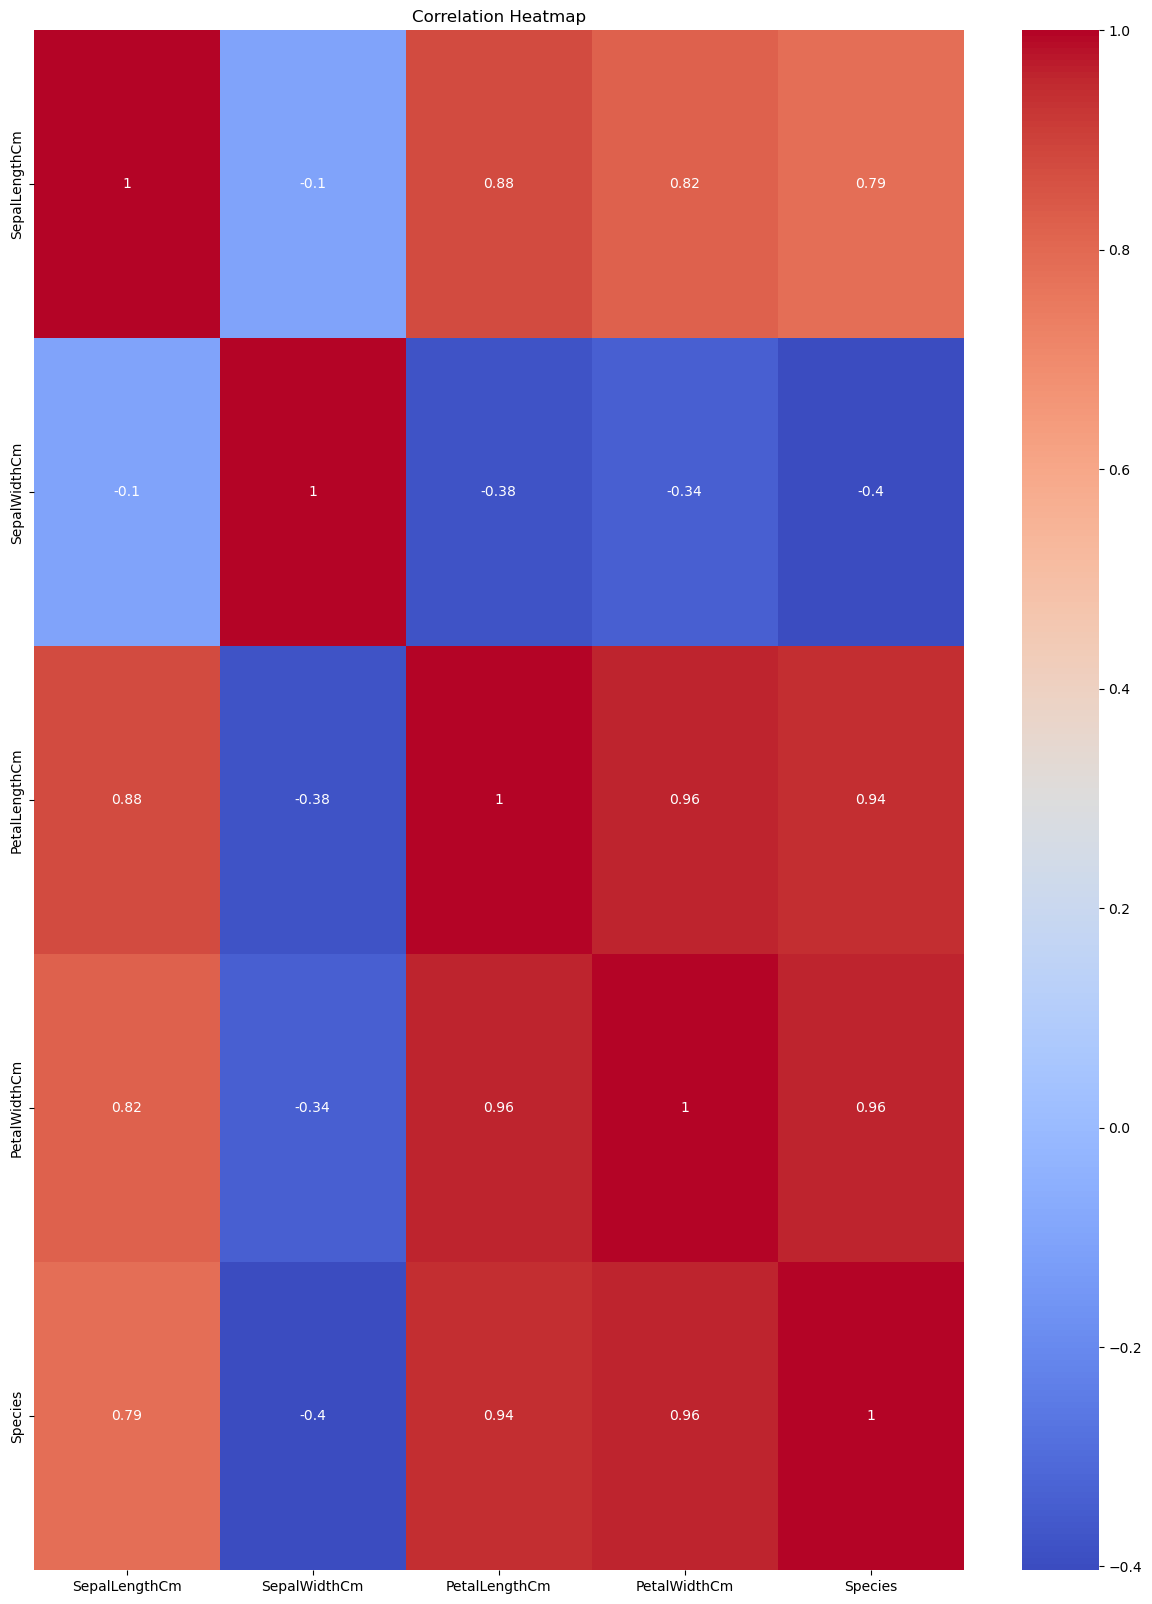

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlations between features and target
correlations = df.corr()['Species'].drop('Species')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## DataTransformation

In [17]:
x=df.drop(['Species'],axis=1)
y=df['Species']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [19]:
scaler=StandardScaler();
x_train=scaler.fit_transform(x_train);
x_test=scaler.transform(x_test);


## Regression

In [20]:
regressor=LinearRegression();
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pread=regressor.predict(x_test)

In [22]:
y_pread

array([ 1.15197281e+00, -3.63693809e-02,  2.25124407e+00,  8.70811134e-01,
        1.51716225e+00, -1.87324491e-01,  1.19638290e+00,  1.87868033e+00,
        1.03443940e+00,  1.55494064e+00,  1.72065650e+00, -9.61330681e-02,
       -8.92822025e-02, -8.92822025e-02, -4.56828317e-02,  9.03078879e-01,
        1.70312037e+00,  1.57979511e+00,  1.39884857e+00,  1.98920836e+00,
        7.85709761e-04,  1.89032492e+00, -8.19018280e-02,  1.92882023e+00,
        1.59461182e+00,  1.92352745e+00,  1.74949512e+00,  1.92623226e+00,
       -7.47393136e-02,  3.10570337e-02,  1.65972060e-01, -5.05081416e-02,
        1.37057236e+00, -2.17315553e-02,  1.96992062e-01,  1.58250845e+00,
        1.35153887e+00, -9.64142731e-02, -9.61026243e-02,  3.43376371e-01,
        1.77559733e+00,  1.32282563e+00,  1.22668712e+00, -3.58703160e-02,
       -1.12236497e-01])

In [23]:
y_test

74     1
19     0
118    2
79     1
77     1
32     0
65     1
141    2
69     1
83     1
110    2
12     0
37     0
9      0
20     0
57     1
137    2
70     1
56     1
132    2
30     0
124    2
27     0
128    2
129    2
145    2
111    2
102    2
46     0
31     0
23     0
16     0
66     1
11     0
43     0
106    2
52     1
28     0
4      0
33     0
121    2
86     1
87     1
17     0
10     0
Name: Species, dtype: int32

In [24]:
print(r2_score(y_pread,y_test))  # nothing will chane the when we switch the position

0.9151978116620695


In [25]:
print(r2_score(y_test,y_pread))

0.9167628094661775


## LogisticRegression

In [26]:
logistic=LogisticRegression();


In [27]:
logistic.fit(x_train,y_train);

In [28]:
y_pread=logistic.predict(x_test);

In [29]:
y_pread


array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [30]:
y_test

74     1
19     0
118    2
79     1
77     1
32     0
65     1
141    2
69     1
83     1
110    2
12     0
37     0
9      0
20     0
57     1
137    2
70     1
56     1
132    2
30     0
124    2
27     0
128    2
129    2
145    2
111    2
102    2
46     0
31     0
23     0
16     0
66     1
11     0
43     0
106    2
52     1
28     0
4      0
33     0
121    2
86     1
87     1
17     0
10     0
Name: Species, dtype: int32

In [31]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



In [32]:
print(confusion_matrix(y_test,y_pread))

[[19  0  0]
 [ 0 10  3]
 [ 0  1 12]]


In [33]:
print(accuracy_score(y_test,y_pread))

0.9111111111111111


## Naive model

In [34]:
model_naive= GaussianNB();


In [35]:
model_naive.fit(x_train,y_train);


In [36]:
y_pread=model_naive.predict(x_test);

In [37]:
y_pread

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0,
       0])

In [38]:
y_test

74     1
19     0
118    2
79     1
77     1
32     0
65     1
141    2
69     1
83     1
110    2
12     0
37     0
9      0
20     0
57     1
137    2
70     1
56     1
132    2
30     0
124    2
27     0
128    2
129    2
145    2
111    2
102    2
46     0
31     0
23     0
16     0
66     1
11     0
43     0
106    2
52     1
28     0
4      0
33     0
121    2
86     1
87     1
17     0
10     0
Name: Species, dtype: int32

In [39]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.80      0.62      0.70        13
           2       0.71      0.92      0.80        13

    accuracy                           0.84        45
   macro avg       0.84      0.83      0.82        45
weighted avg       0.86      0.84      0.84        45



In [40]:
print(confusion_matrix(y_test,y_pread))

[[18  1  0]
 [ 0  8  5]
 [ 0  1 12]]


In [41]:
print(accuracy_score(y_test,y_pread))

0.8444444444444444


In [ ]:
# # print(confusion_matrix(y_test,y_pread))
# tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

In [ ]:
# print(tn,fp,fn,tp)

In [ ]:
# a=accuracy_score(y_test,y_pred)
# # accuracy =  (TP + TN) / (TP + TN + FP + FN)
# a

In [ ]:
# precision_score(y_test, y_pred)
# # precision = TP / (TP + FP)

In [ ]:
# recall_score(y_test, y_pred)
# # recall = TP / (TP + FN)

In [ ]:
# # f1_Score = 2 * (precision * recall) / (precision + recall)
# f1_score(y_test,y_pred)

In [ ]:
# le = LabelEncoder()
# for col in king:
#     if df[col].dtype == 'object':  # Check if the column is of object type (categorical)
#         df[col] = le.fit_transform(df[col])